In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

---

In [2]:
# Load the dataset
b_cancer = load_breast_cancer()

# Check the description
print(b_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

---

In [3]:
# Create a DataFrame
df = pd.DataFrame(b_cancer.data, columns=b_cancer.feature_names)

# Add the target column to the DataFrame
df['is_benign'] = b_cancer.target

# Check the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

---

In [4]:
# Create feature and target arrays
X = df.drop('is_benign', axis=1)
Y = df['is_benign']

X.columns, Y

(Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error', 'fractal dimension error',
        'worst radius', 'worst texture', 'worst perimeter', 'worst area',
        'worst smoothness', 'worst compactness', 'worst concavity',
        'worst concave points', 'worst symmetry', 'worst fractal dimension'],
       dtype='object'),
 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 564    0
 565    0
 566    0
 567    0
 568    1
 Name: is_benign, Length: 569, dtype: int64)

In [5]:
# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# Scale the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the model
model = LogisticRegression()
model.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred = model.predict(X_test)

# Evaluate the model
cm = confusion_matrix(Y_test, Y_pred)
acc = accuracy_score(Y_test, Y_pred)
prec = precision_score(Y_test, Y_pred)
rec = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)
roc_auc = roc_auc_score(Y_test, Y_pred)

# Check out the metrics
print(f"Confusion Matrix: \n{cm}")
print(f"Accuracy: {acc}")
print(f"Precision: {prec}")
print(f"Recall: {rec}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")

Confusion Matrix: 
[[ 60   3]
 [  1 107]]
Accuracy: 0.9766081871345029
Precision: 0.9727272727272728
Recall: 0.9907407407407407
F1 Score: 0.981651376146789
ROC AUC Score: 0.9715608465608465


---

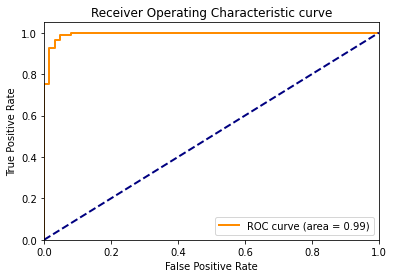

In [6]:
# Extra contents from here

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get the predicted probabilities for the positive class
Y_pred_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(Y_test, Y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic curve')
plt.legend(loc="lower right")
plt.show()

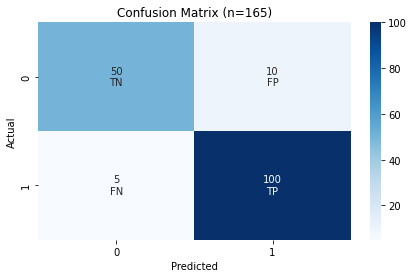

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create example confusion matrix cm
cm = [[50, 10],
      [5, 100]]

cm_df = pd.DataFrame(cm, columns=["0", "1"], 
                     index=["0", "1"])

plt.figure(figsize=(7, 4))
ax = sns.heatmap(cm_df, annot=True, fmt="d", cmap='Blues')

plt.title('Confusion Matrix (n=165)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Annotate TN, FP, FN, TP
for text in ax.texts:
    text.set_text(text.get_text() + "\n" + ["TN", "FP", "FN", "TP"][ax.texts.index(text)])

plt.show()

In [8]:
# Calculate the evaluation metrics from the given confusion matrix
TP = 100; TN = 50; FP = 10; FN = 5; N = 165
accuracy = (TP + TN) / N
recall = TP / (TP + FN)
fall_out = FP / (FP + TN)
specificity = TN / (TN + FP)
precision = TP / (TP + FP)
f1_score = 2 * ((precision * recall)/(precision + recall))

accuracy, recall, fall_out, specificity, precision, f1_score

(0.9090909090909091,
 0.9523809523809523,
 0.16666666666666666,
 0.8333333333333334,
 0.9090909090909091,
 0.9302325581395349)